<a href="https://colab.research.google.com/github/mcbhavana27/ITS/blob/main/nas_TCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from glob import glob
from keras.models import Sequential
from keras.metrics import MeanSquaredError as mae
from keras.layers import LSTM,Dense,Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from math import sqrt
#from bokeh.plotting import figure,output_file, show
import datetime
!pip install keras-tcn
from tcn import TCN
from tcn import tcn_full_summary
#from openpyxl import Workbook,load_workbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp  /content/drive/My\ Drive/DATA.zip /content/
!unzip DATA.zip

Archive:  DATA.zip
   creating: DATA/
   creating: DATA/402214/
  inflating: DATA/402214/8.csv       
  inflating: DATA/402214/9.csv       
  inflating: DATA/402214/1.csv       
  inflating: DATA/402214/2.csv       
  inflating: DATA/402214/5.csv       
  inflating: DATA/402214/4.csv       
  inflating: DATA/402214/11.csv      
  inflating: DATA/402214/3.csv       
  inflating: DATA/402214/10.csv      
  inflating: DATA/402214/12.csv      
  inflating: DATA/402214/13.csv      
  inflating: DATA/402214/7.csv       
  inflating: DATA/402214/6.csv       
   creating: DATA/402510/
  inflating: DATA/402510/3.csv       
  inflating: DATA/402510/12.csv      
  inflating: DATA/402510/13.csv      
  inflating: DATA/402510/10.csv      
  inflating: DATA/402510/8.csv       
  inflating: DATA/402510/4.csv       
  inflating: DATA/402510/11.csv      
  inflating: DATA/402510/7.csv       
  inflating: DATA/402510/6.csv       
  inflating: DATA/402510/9.csv       
  inflating: DATA/402510/5.csv      

In [ ]:
filenames = glob('/content/DATA/402214'+'/*.csv')
print(filenames)

['/content/DATA/402214/2.csv', '/content/DATA/402214/1.csv', '/content/DATA/402214/5.csv', '/content/DATA/402214/8.csv', '/content/DATA/402214/7.csv', '/content/DATA/402214/9.csv', '/content/DATA/402214/12.csv', '/content/DATA/402214/13.csv', '/content/DATA/402214/11.csv', '/content/DATA/402214/4.csv', '/content/DATA/402214/6.csv', '/content/DATA/402214/3.csv', '/content/DATA/402214/10.csv']


In [ ]:
data = []
for filename in filenames:
    data.append(pd.read_csv(filename))
full_data =pd.concat(data,ignore_index=True)

In [ ]:
cols = list(full_data)[2]

In [ ]:
training_data=full_data[cols].astype(str)


In [ ]:
training_data = np.array(training_data).reshape(len(training_data),1)

In [ ]:
scaler =MinMaxScaler(feature_range=(0,1))
training_scaled = scaler.fit_transform(training_data)

In [ ]:
training_scaled[:15],training_scaled[15,-1]

(array([[0.17647059],
        [0.17647059],
        [0.16993464],
        [0.16339869],
        [0.15686275],
        [0.14379085],
        [0.1372549 ],
        [0.12418301],
        [0.11764706],
        [0.11111111],
        [0.10457516],
        [0.10457516],
        [0.09803922],
        [0.09150327],
        [0.09150327]]), 0.08496732026143791)

In [ ]:
n_steps = 30

In [ ]:
def split_set1(X):
    S = []
    HS= []
    i=0
    while i < len(X)-n_steps:
        l=[]
        l.append(X[i:n_steps+i])
        S.append(l)
        l=[]
        l.append(X[n_steps+i])
        HS.append(l)
        i+=1
    S=np.array(S)
    HS=np.array(HS)
    S=S.reshape(S.shape[0],S.shape[2],S.shape[3])
    HS=HS.reshape(HS.shape[0],HS.shape[1])
    return S,HS


In [ ]:
X,Y = split_set1(training_scaled)

In [ ]:
t_d=len(training_scaled)//5

In [ ]:
t_d

5238

In [ ]:
train_X,test_X,train_Y,test_Y = X[:-t_d],X[-t_d:-1],Y[:-t_d],Y[-t_d:-1]

In [ ]:
len(test_X)

5237

In [ ]:
test_Y=test_Y.reshape(test_Y.shape[0],1)

In [ ]:
train_Y.shape

(20925, 1)

In [ ]:
def Create_Model():
    Model=Sequential()
    Model.add(TCN(24,15,2,dilations=(1,2,4,8,16),padding = 'causal',use_skip_connections= True,activation ='relu',dropout_rate=.1,input_shape = (n_steps,1)))
    Model.add(Dense(10,activation='relu'))
    Model.add(Dense(1))
    Model.compile(optimizer="adam", loss = "mse")
    return Model


In [ ]:
model = Create_Model()

In [ ]:
history=model.fit(train_X,train_Y,epochs=100,validation_split=.15, verbose=1)

Epoch 1/100
556/556 [==============================] - 74s 111ms/step - loss: 0.0156 - val_loss: 2.5119e-04
Epoch 2/100
556/556 [==============================] - 58s 105ms/step - loss: 0.0012 - val_loss: 4.8670e-04
Epoch 3/100
556/556 [==============================] - 59s 106ms/step - loss: 6.9473e-04 - val_loss: 2.0382e-04
Epoch 4/100
556/556 [==============================] - 60s 108ms/step - loss: 4.7762e-04 - val_loss: 8.8233e-05
Epoch 5/100
556/556 [==============================] - 57s 103ms/step - loss: 3.7488e-04 - val_loss: 9.6586e-05
Epoch 6/100
556/556 [==============================] - 57s 103ms/step - loss: 2.9490e-04 - val_loss: 9.1660e-05
Epoch 7/100
556/556 [==============================] - 57s 102ms/step - loss: 2.6902e-04 - val_loss: 1.0760e-04
Epoch 8/100
556/556 [==============================] - 62s 112ms/step - loss: 2.4864e-04 - val_loss: 1.7081e-04
Epoch 9/100
556/556 [==============================] - 56s 101ms/step - loss: 2.4080e-04 - val_loss: 6.5235e-05


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 24)                165048    
                                                                 
 dense (Dense)               (None, 10)                250       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 165,309
Trainable params: 165,309
Non-trainable params: 0
_________________________________________________________________


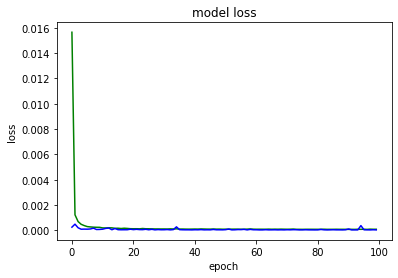

In [ ]:
plt.plot(history.history["loss"],color='green')
plt.plot(history.history["val_loss"],color='blue')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
y_predict_scaled =model.predict(test_X)

164/164 [==============================] - 5s 23ms/step


In [ ]:
y_predict_scaled.shape

(5237, 1)

In [ ]:
y_predict = scaler.inverse_transform(y_predict_scaled)

In [ ]:
test_Y = scaler.inverse_transform(test_Y)

In [ ]:
print(mae(y_predict,test_Y))


1.9634664931414758


In [ ]:
print(sqrt(mse(y_predict,test_Y)))

3.589232147112034


In [ ]:
print(mape(y_predict,test_Y))

0.056638341284936375


In [ ]:
print(y_predict[0])

[103.627884]


In [ ]:
len(test_X)

5237

In [ ]:
Error=[]
for i in range(len(test_Y)):
    Error.append(abs(y_predict[i]-test_Y[i]))

In [ ]:
# wb = load_workbook('Test.xlsx')
# ws = wb['TCN1']
# ws = wb.active
# for i in range(len(test_Y)):
#     k=i+2
#     ws['A'+str(k)]=test_Y[i][0]
#     ws['B'+str(k)]=y_predict[i][0]
#     ws['C'+str(k)]=Error[i][0]
# wb.save('Test.xlsx')

NAS implementation

In [ ]:
# Define the search space
num_layers_choices = [2, 3, 4, 5]
filters_choices = [16, 32, 64, 128]
kernel_size_choices = [3, 5, 7, 9]
dropout_rate_choices = [0.1, 0.2, 0.3, 0.4]

In [ ]:
# Perform the neural architecture search
import random
for i in range(10):
    # Generate random hyperparameters
    num_layers = random.choice(num_layers_choices)
    filters = random.choice(filters_choices)
    kernel_size = random.choice(kernel_size_choices)
    dropout_rate = random.choice(dropout_rate_choices)
    # Build the TCN model with the random hyperparameters
    model = Create_Model()
    # Train the model
    history=model.fit(train_X,train_Y,epochs=30,validation_split=.15, verbose=1)
    # Evaluate the model on a validation set
    validation_loss, validation_accuracy = model.evaluate(train_X,train_Y)

    # Print the hyperparameters and validation performance
    print('Model', i+1)
    print('Num Layers:', num_layers)
    print('Filters:', filters)
    print('Kernel Size:', kernel_size)
    print('Dropout Rate:', dropout_rate)
    print('Validation Loss:', validation_loss)
    print('Validation Accuracy:', validation_accuracy)

Epoch 1/30
556/556 [==============================] - 72s 113ms/step - loss: 0.0582 - val_loss: 0.0052
Epoch 2/30
556/556 [==============================] - 58s 105ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 3/30
556/556 [==============================] - 60s 108ms/step - loss: 0.0016 - val_loss: 7.7089e-04
Epoch 4/30
556/556 [==============================] - 59s 105ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5/30
556/556 [==============================] - 59s 106ms/step - loss: 6.9502e-04 - val_loss: 3.9460e-04
Epoch 6/30
556/556 [==============================] - 58s 104ms/step - loss: 5.3487e-04 - val_loss: 1.3765e-04
Epoch 7/30
556/556 [==============================] - 59s 106ms/step - loss: 4.0275e-04 - val_loss: 9.7004e-05
Epoch 8/30
556/556 [==============================] - 59s 106ms/step - loss: 3.5482e-04 - val_loss: 7.3713e-05
Epoch 9/30
556/556 [==============================] - 59s 105ms/step - loss: 2.7825e-04 - val_loss: 1.2199e-04
Epoch 10/30
556/556 [========

TypeError: ignored